In [151]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
from __future__ import division
import numpy as np
import pylab as plt
from linearclassifier_1 import linear_predict, perceptron_update, plot_predictions, log_reg_train


In [153]:
# Create synthetic data

num_dim = 2
num_points = 200
num_classes = 4

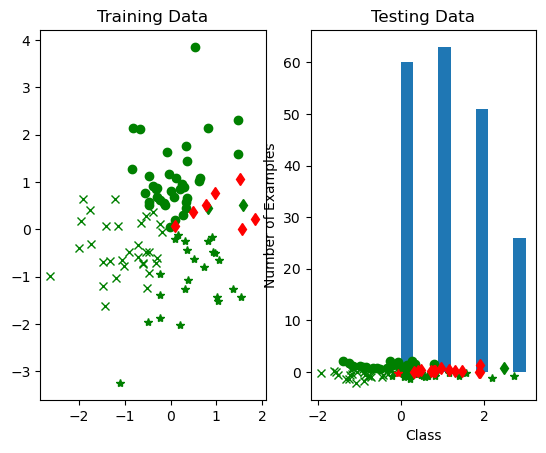

In [154]:
np.random.seed(42)
# On the Mac we tested this on, using this random seed produces a fairly even class balance
# Python is not always consistent across machines with preserving seeded random behavior, 
# so if your histogram shows major class imbalance, change this seed to get better balance

data = np.random.randn(num_dim, num_points)
true_model = {'weights': np.random.randn(num_dim, num_classes)}

labels = linear_predict(data, true_model)
plt.hist(labels)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [155]:
# Create noisy labels
noise_index = np.random.rand(num_points) < 0.3
noisy_labels = labels.copy()
noisy_labels[noise_index] = np.random.randint(0, num_classes, np.count_nonzero(noise_index))

In [156]:
# Plot generated data
markers = ['xr', 'ob', '*m',  'dk']

plt.subplot(121)
for i in range(num_classes):
    plt.plot(data[0, labels == i], data[1, labels == i], markers[i])
plt.title('Separable Data')

plt.subplot(122)
for i in range(num_classes):
    plt.plot(data[0, noisy_labels == i], data[1, noisy_labels == i], markers[i])
plt.title('Noisy Data')

Text(0.5, 1.0, 'Noisy Data')

In [157]:
# split into training and testing sets

num_train = int(num_points / 2)
num_test = num_points - num_train

train_data = data[:, :num_train]
test_data = data[:, num_train + 1:]

# store noiseless and noisy labels in tuples

train_labels = (labels[:num_train], noisy_labels[:num_train])
test_labels = (labels[num_train + 1:], noisy_labels[num_train + 1:])

In [158]:
# Perceptron experiment

epochs = 20
alpha_val = 1

train_accuracy = dict()
test_accuracy = dict()
model = dict()
params = {'alpha': alpha_val}

for is_noisy in (False, True):
    model[is_noisy] = { 'weights': np.zeros((num_dim, num_classes)) }
    train_accuracy[is_noisy] = np.zeros(epochs)
    test_accuracy[is_noisy] = np.zeros(epochs)
 
    for epoch in range(epochs):
        # first measure training and testing accuracy            
        predictions = linear_predict(train_data, model[is_noisy])
        train_accuracy[is_noisy][epoch] = np.sum(predictions == train_labels[is_noisy]) / num_train

        predictions = linear_predict(test_data, model[is_noisy])
        test_accuracy[is_noisy][epoch] = np.sum(predictions == test_labels[is_noisy]) / num_test

        # run perceptron training
        mistakes = 0
        for i in range(num_train):
            correct = perceptron_update(train_data[:, i], model[is_noisy], params, train_labels[is_noisy][i])
            
            if not correct:
                mistakes += 1
        
        print("Finished epoch %d with %d mistakes." % (epoch, mistakes))

Finished epoch 0 with 25 mistakes.
Finished epoch 1 with 10 mistakes.
Finished epoch 2 with 7 mistakes.
Finished epoch 3 with 7 mistakes.
Finished epoch 4 with 5 mistakes.
Finished epoch 5 with 4 mistakes.
Finished epoch 6 with 3 mistakes.
Finished epoch 7 with 8 mistakes.
Finished epoch 8 with 5 mistakes.
Finished epoch 9 with 5 mistakes.
Finished epoch 10 with 9 mistakes.
Finished epoch 11 with 4 mistakes.
Finished epoch 12 with 4 mistakes.
Finished epoch 13 with 4 mistakes.
Finished epoch 14 with 3 mistakes.
Finished epoch 15 with 4 mistakes.
Finished epoch 16 with 8 mistakes.
Finished epoch 17 with 4 mistakes.
Finished epoch 18 with 4 mistakes.
Finished epoch 19 with 4 mistakes.
Finished epoch 0 with 50 mistakes.
Finished epoch 1 with 45 mistakes.
Finished epoch 2 with 48 mistakes.
Finished epoch 3 with 48 mistakes.
Finished epoch 4 with 48 mistakes.
Finished epoch 5 with 48 mistakes.
Finished epoch 6 with 43 mistakes.
Finished epoch 7 with 43 mistakes.
Finished epoch 8 with 47 mis

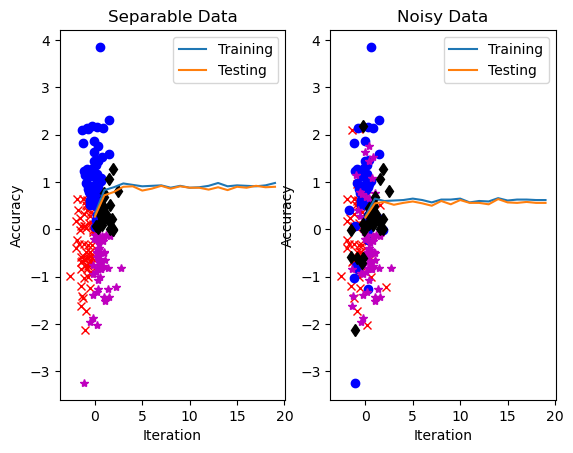

Train Accuracy for Separable Data: 0.980000
Test Accuracy for Separable Data: 0.900000
Train Accuracy for Noisy Data: 0.620000
Test Accuracy for Noisy Data: 0.560000
Red markers indicate incorrect predictions


In [159]:
# Plot results of perceptron training

plt.subplot(121)
train_line = plt.plot(range(epochs), train_accuracy[False], label="Training")
test_line = plt.plot(range(epochs), test_accuracy[False], label="Testing")
plt.title('Separable Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
train_line = plt.plot(range(epochs), train_accuracy[True], label="Training")
test_line = plt.plot(range(epochs), test_accuracy[True], label="Testing")
plt.title('Noisy Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print("Train Accuracy for Separable Data: %f" % train_accuracy[False][epochs-1])
print("Test Accuracy for Separable Data: %f" % test_accuracy[False][epochs-1])
print("Train Accuracy for Noisy Data: %f" % train_accuracy[True][epochs-1])
print("Test Accuracy for Noisy Data: %f" % test_accuracy[True][epochs-1])

# plot clean predictions

test_predictions = linear_predict(test_data, model[False])
train_predictions = linear_predict(train_data, model[False])

plt.subplot(121)
plot_predictions(train_data, train_labels[False], train_predictions)
plt.title('Training Data')
plt.subplot(122)
plot_predictions(test_data, test_labels[False], test_predictions)
plt.title('Testing Data')

print("Red markers indicate incorrect predictions")

In [160]:
# Logistic regression gradient check

# first check if the gradient and objective function are consistent with each other
_ = log_reg_train(train_data, train_labels[True],
              {'weights': np.random.randn(num_dim * num_classes)}, check_gradient=True)

Provided gradient differed from numerical approximation by 3.696099e-06 (should be around 1e-3 or less)


In [161]:
# Logistic regression experiment

model = dict()

for is_noisy in (False, True):
    model[is_noisy] = {'weights': np.zeros((num_dim, num_classes))}
    
    model[is_noisy] = log_reg_train(train_data, train_labels[is_noisy], model[is_noisy])
        
    train_predictions = linear_predict(train_data, model[is_noisy])
    train_accuracy[is_noisy] = np.sum(train_predictions == train_labels[is_noisy]) / num_train

    test_predictions = linear_predict(test_data, model[is_noisy])
    test_accuracy[is_noisy] = np.sum(test_predictions == test_labels[is_noisy]) / num_test
    
print("Train Accuracy for Separable Data: %f" % train_accuracy[False])
print("Test Accuracy for Separable Data: %f" % test_accuracy[False])
print("Train Accuracy for Noisy Data: %f" % train_accuracy[True])
print("Test Accuracy for Noisy Data: %f" % test_accuracy[True])


Train Accuracy for Separable Data: 1.000000
Test Accuracy for Separable Data: 0.970000
Train Accuracy for Noisy Data: 0.700000
Test Accuracy for Noisy Data: 0.590000
